In [251]:
# Importing Libraries

import os
import re
import pandas as pd
import numpy as np
import itertools

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

import librosa
import librosa.display

# to play the audio files
from IPython.display import Audio

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import keras
from keras import backend as K
from keras import models
from keras import layers
from keras.utils import np_utils
from tensorflow.keras.models import load_model
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [252]:
# Paths to dataset
Ravdess = "D:/SEM 3/Project/Dataset/Ravdess/audio_speech_actors_01-24"
Crema = "D:/SEM 3/Project/Dataset/Crema"
Savee = "D:/SEM 3/Project/Dataset/Savee"
Tess = "D:/SEM 3/Project/Dataset/Tess"

In [253]:
# RAVDEES dataset

ravdess_directory_list = os.listdir(Ravdess)

emotion_df = []

for dir in ravdess_directory_list:
    # As there are 20 different actors in the directory we need to extract files for each actor.
    actor = os.listdir(os.path.join(Ravdess, dir))
    for wav in actor:
        info = wav.partition(".wav")[0].split("-")
        # Third element in each file represents the emotion associated to that file.
        emotion = int(info[2])
        emotion_df.append((emotion, os.path.join(Ravdess, dir, wav)))

In [254]:
# Create dataframe with emotion and their respective paths.
Ravdess_df = pd.DataFrame.from_dict(emotion_df)
Ravdess_df.rename(columns={0 : "Emotion", 1 : "Path"}, inplace=True)

In [255]:
# changing integers to actual emotions.

Ravdess_df.Emotion.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},\
                            inplace=True)
Ravdess_df.head()

,Emotion,Path
0,neutral,D:/SEM 3/Project/Dataset/Ravdess/audio_speech_...
1,neutral,D:/SEM 3/Project/Dataset/Ravdess/audio_speech_...
2,neutral,D:/SEM 3/Project/Dataset/Ravdess/audio_speech_...
3,neutral,D:/SEM 3/Project/Dataset/Ravdess/audio_speech_...
4,calm,D:/SEM 3/Project/Dataset/Ravdess/audio_speech_...


In [256]:
# CREMA dataset

emotion_df = []

for wav in os.listdir(Crema):
    info = wav.partition(".wav")[0].split("_")
    if info[2] == 'SAD':
        emotion_df.append(("sad", Crema + "/" + wav))
    elif info[2] == 'ANG':
        emotion_df.append(("angry", Crema + "/" + wav))
    elif info[2] == 'DIS':
        emotion_df.append(("disgust", Crema + "/" + wav))
    elif info[2] == 'FEA':
        emotion_df.append(("fear", Crema + "/" + wav))
    elif info[2] == 'HAP':
        emotion_df.append(("happy", Crema + "/" + wav))
    elif info[2] == 'NEU':
        emotion_df.append(("neutral", Crema + "/" + wav))
    else:
        emotion_df.append(("unknown", Crema + "/" + wav))


Crema_df = pd.DataFrame.from_dict(emotion_df)
Crema_df.rename(columns={0 : "Emotion", 1 : "Path"}, inplace=True)

Crema_df.head()

,Emotion,Path
0,angry,D:/SEM 3/Project/Dataset/Crema/1001_DFA_ANG_XX...
1,disgust,D:/SEM 3/Project/Dataset/Crema/1001_DFA_DIS_XX...
2,fear,D:/SEM 3/Project/Dataset/Crema/1001_DFA_FEA_XX...
3,happy,D:/SEM 3/Project/Dataset/Crema/1001_DFA_HAP_XX...
4,neutral,D:/SEM 3/Project/Dataset/Crema/1001_DFA_NEU_XX...


In [257]:
# Tess dataset

tess_directory_list = os.listdir(Tess)

emotion_df = []

for dir in tess_directory_list:
    for wav in os.listdir(os.path.join(Tess, dir)):
        info = wav.partition(".wav")[0].split("_")
        emo = info[2]
        if emo == "ps":
            emotion_df.append(("surprise", os.path.join(Tess, dir, wav)))
        else:
            emotion_df.append((emo, os.path.join(Tess, dir, wav)))


Tess_df = pd.DataFrame.from_dict(emotion_df)
Tess_df.rename(columns={0 : "Emotion", 1 : "Path"}, inplace=True)

Tess_df.head()

,Emotion,Path
0,angry,D:/SEM 3/Project/Dataset/Tess\OAF_angry\OAF_ba...
1,angry,D:/SEM 3/Project/Dataset/Tess\OAF_angry\OAF_ba...
2,angry,D:/SEM 3/Project/Dataset/Tess\OAF_angry\OAF_ba...
3,angry,D:/SEM 3/Project/Dataset/Tess\OAF_angry\OAF_ba...
4,angry,D:/SEM 3/Project/Dataset/Tess\OAF_angry\OAF_be...


In [258]:
# SAVEE dataset

savee_directiory_list = os.listdir(Savee)

emotion_df = []

for wav in savee_directiory_list:
    info = wav.partition(".wav")[0].split("_")[1].replace(r"[0-9]", "")
    emotion = re.split(r"[0-9]", info)[0]
    if emotion=='a':
        emotion_df.append(("angry", Savee + "/" + wav))
    elif emotion=='d':
        emotion_df.append(("disgust", Savee + "/" + wav))
    elif emotion=='f':
        emotion_df.append(("fear", Savee + "/" + wav))
    elif emotion=='h':
        emotion_df.append(("happy", Savee + "/" + wav))
    elif emotion=='n':
        emotion_df.append(("neutral", Savee + "/" + wav))
    elif emotion=='sa':
        emotion_df.append(("sad", Savee + "/" + wav))
    else:
        emotion_df.append(("surprise", Savee + "/" + wav))


Savee_df = pd.DataFrame.from_dict(emotion_df)
Savee_df.rename(columns={0 : "Emotion", 1 : "Path"}, inplace=True)

Savee_df.head()

,Emotion,Path
0,angry,D:/SEM 3/Project/Dataset/Savee/DC_a01.wav
1,angry,D:/SEM 3/Project/Dataset/Savee/DC_a02.wav
2,angry,D:/SEM 3/Project/Dataset/Savee/DC_a03.wav
3,angry,D:/SEM 3/Project/Dataset/Savee/DC_a04.wav
4,angry,D:/SEM 3/Project/Dataset/Savee/DC_a05.wav


In [259]:
# Creating Dataframe using all the 4 dataframes for doing some analysis.

speech_df = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
speech_df.to_csv("dataset.csv", index=False)
speech_df.head()

,Emotion,Path
0,neutral,D:/SEM 3/Project/Dataset/Ravdess/audio_speech_...
1,neutral,D:/SEM 3/Project/Dataset/Ravdess/audio_speech_...
2,neutral,D:/SEM 3/Project/Dataset/Ravdess/audio_speech_...
3,neutral,D:/SEM 3/Project/Dataset/Ravdess/audio_speech_...
4,calm,D:/SEM 3/Project/Dataset/Ravdess/audio_speech_...


In [260]:
speech_df.shape

(12162, 2)

# Data Visualisation and Exploration

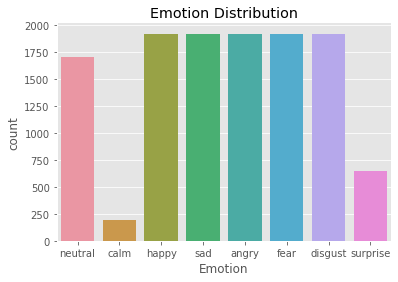

In [261]:
plt.title("Emotion Distribution")
sns.countplot(x = speech_df["Emotion"])
sns.despine(top=True, right=True, left=False, bottom=False)

We can also plot waveplots and spectograms for audio signals

* Waveplots - Waveplots let us know the loudness of the audio at a given time.

* Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

In [262]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot with {} emotion'.format(e), size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram with {} emotion'.format(e), size=20)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

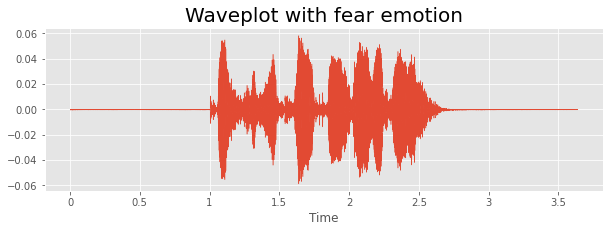

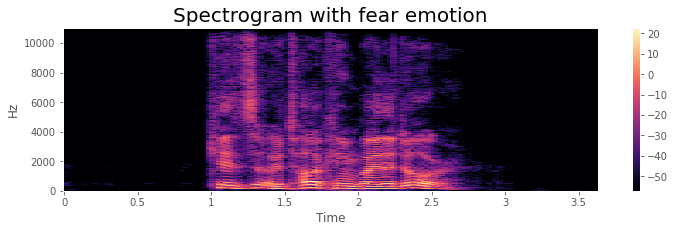

In [263]:
emotion = 'fear'
path = np.array(speech_df.Path[speech_df.Emotion == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

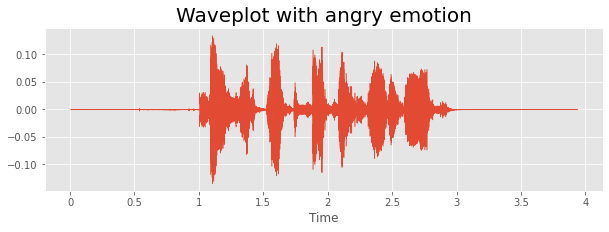

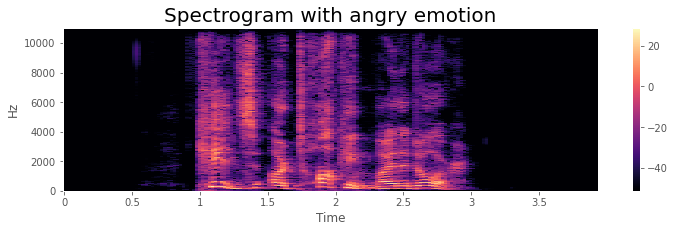

In [264]:
emotion='angry'
path = np.array(speech_df.Path[speech_df.Emotion == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

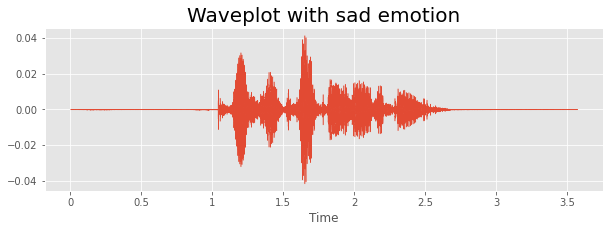

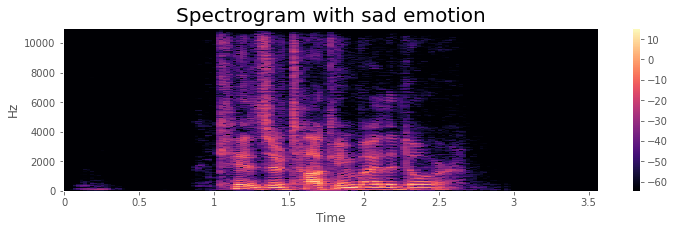

In [265]:
emotion = 'sad'
path = np.array(speech_df.Path[speech_df.Emotion == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

# Data Augmentation

In [266]:
def noise(data, random=False, rate=0.035, threshold=0.075):
    """Add some noise to sound sample. Use random if you want to add random noise with some threshold.
    Or use rate Random=False and rate for always adding fixed noise."""
    if random:
        rate = np.random.random() * threshold
    noise_amp = rate*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    """Stretching data with some rate."""
    return librosa.effects.time_stretch(data, rate)

def shift(data, rate=1000):
    """Shifting data with some rate"""
    shift_range = int(np.random.uniform(low=-5, high = 5)*rate)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7, random=False):
    """"Add some pitch to sound sample. Use random if you want to add random pitch with some threshold.
    Or use pitch_factor Random=False and rate for always adding fixed pitch."""
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [267]:
path = speech_df[speech_df["Emotion"] == "happy"]["Path"].iloc[0]
data, sampling_rate = librosa.load(path)

### Simple audio

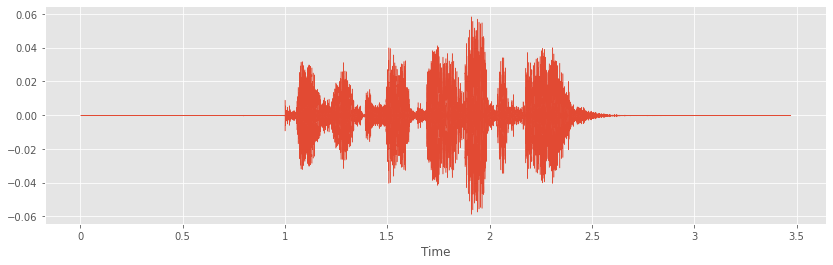

In [268]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(data, sampling_rate)
Audio(path)

### Audo with Noise

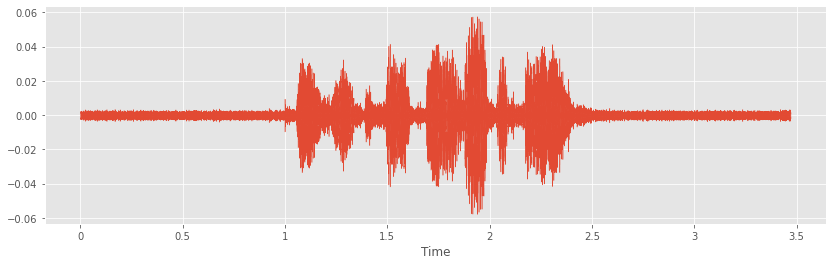

In [269]:
noised_data = noise(data, random=True)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=noised_data, sr=sampling_rate)
Audio(noised_data, rate=sampling_rate)

### Stretched Audio

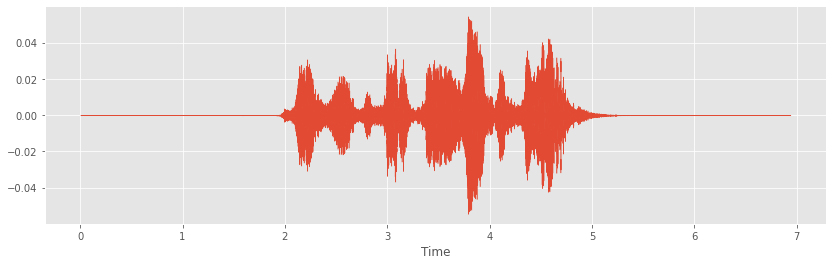

In [270]:
stretched_data = stretch(data, rate=0.5)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=stretched_data, sr=sampling_rate)
Audio(stretched_data, rate=sampling_rate)

### Shifting Audio

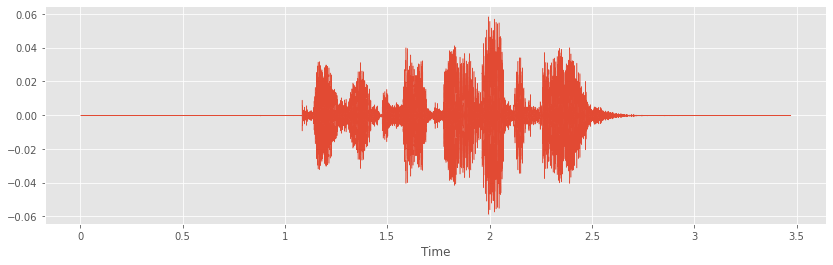

In [271]:
shifted_data = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=shifted_data, sr=sampling_rate)
Audio(shifted_data, rate=sampling_rate)

### Audio Pitching

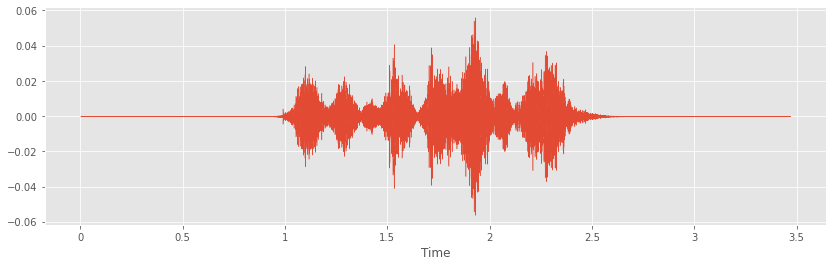

In [272]:
pitched_data = pitch(data, sampling_rate, pitch_factor=0.5, random=True)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=pitched_data, sr=sampling_rate)
Audio(pitched_data, rate=sampling_rate)

# Feature extraction

In [273]:
n_fft = 2048
hop_length = 512

In [274]:
def chunks(data, frame_length, hop_length):
    for i in range(0, len(data), hop_length):
        yield data[i:i+frame_length]

# Zero Crossing Rate
def zcr(data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)


def energy(data, frame_length=2048, hop_length=512):
    en = np.array([np.sum(np.power(np.abs(data[hop:hop+frame_length]), 2)) for hop in range(0, data.shape[0], hop_length)])
    return en / frame_length


def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)


def entropy_of_energy(data, frame_length=2048, hop_length=512):
    energies = energy(data, frame_length, hop_length)
    energies /= np.sum(energies)

    entropy = 0.0
    entropy -= energies * np.log2(energies)
    return entropy


def spc(data, sr, frame_length=2048, hop_length=512):
    spectral_centroid = librosa.feature.spectral_centroid(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(spectral_centroid)


def spc_flux(data):
    isSpectrum = data.ndim == 1
    if isSpectrum:
        data = np.expand_dims(data, axis=1)

    X = np.c_[data[:, 0], data]
    af_Delta_X = np.diff(X, 1, axis=1)
    vsf = np.sqrt((np.power(af_Delta_X, 2).sum(axis=0))) / X.shape[0]

    return np.squeeze(vsf) if isSpectrum else vsf


def spc_rollof(data, sr, frame_length=2048, hop_length=512):
    spcrollof = librosa.feature.spectral_rolloff(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(spcrollof)


def chroma_stft(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    stft = np.abs(librosa.stft(data))
    chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sr)
    return np.squeeze(chroma_stft.T) if not flatten else np.ravel(chroma_stft.T)


def mel_spc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mel = librosa.feature.melspectrogram(y=data, sr=sr)
    return np.squeeze(mel.T) if not flatten else np.ravel(mel.T)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

In [275]:
path = np.array(speech_df["Path"])[658]
data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
len(data)

54458

In [276]:
print("ZCR: ", zcr(data).shape)
print("Energy: ", energy(data).shape)
print("Entropy of Energy :", entropy_of_energy(data).shape)
print("RMS :", rmse(data).shape)
print("Spectral Centroid :", spc(data, sampling_rate).shape)
# print("Spectral Entropy: ", spc_entropy(data, sampling_rate).shape)
print("Spectral Flux: ", spc_flux(data).shape)
print("Spectral Rollof: ", spc_rollof(data, sampling_rate).shape)
print("Chroma STFT: ", chroma_stft(data, sampling_rate).shape)
print("MelSpectrogram: ", mel_spc(data, sampling_rate).shape)
print("MFCC: ", mfcc(data, sampling_rate).shape)

ZCR:  (107,)
Energy:  (107,)
Entropy of Energy : (107,)
RMS : (107,)
Spectral Centroid : (107,)
Spectral Flux:  ()
Spectral Rollof:  (107,)
Chroma STFT:  (1284,)
MelSpectrogram:  (13696,)
MFCC:  (2140,)


In [277]:
def extract_features(data, sr, frame_length=2048, hop_length=512):
    result = np.array([])
    result = np.hstack((result,
                        zcr(data, frame_length, hop_length),
                        rmse(data, frame_length, hop_length),
                        mfcc(data, sr, frame_length, hop_length)))
    return result

In [278]:
def get_features(path, duration=2.5, offset=0.6):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=duration, offset=offset)

     # without augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data, random=True)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2)) # stacking vertically

    # data with pitching
    pitched_data = pitch(data, sample_rate, random=True)
    res3 = extract_features(pitched_data, sample_rate)
    result = np.vstack((result, res3)) # stacking vertically

    # data with pitching and white_noise
    new_data = pitch(data, sample_rate, random=True)
    data_noise_pitch = noise(new_data, random=True)
    res3 = extract_features(data_noise_pitch, sample_rate)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [283]:
X, Y = [], []
print("Feature processing...")
for path, emotion, ind in zip(speech_df.Path, speech_df.Emotion, range(speech_df.Path.shape[0])):
    features = get_features(path)
    if ind % 100 == 0:
        print(f"{ind} samples has been processed...")
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
print("Done.")

Feature processing...
0 samples has been processed...
100 samples has been processed...
200 samples has been processed...
300 samples has been processed...
400 samples has been processed...
500 samples has been processed...
600 samples has been processed...
700 samples has been processed...
800 samples has been processed...
900 samples has been processed...
1000 samples has been processed...
1100 samples has been processed...
1200 samples has been processed...
1300 samples has been processed...
1400 samples has been processed...
1500 samples has been processed...
1600 samples has been processed...
1700 samples has been processed...
1800 samples has been processed...
1900 samples has been processed...
2000 samples has been processed...
2100 samples has been processed...
2200 samples has been processed...
2300 samples has been processed...
2400 samples has been processed...
2500 samples has been processed...
2600 samples has been processed...
2700 samples has been processed...
2800 sampl

In [284]:
features_df = pd.DataFrame(X)
features_df["labels"] = Y
# features_df.to_csv('extracted_features.csv', index=False)
features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,labels
0,0.112305,0.171875,0.264160,0.356445,0.502441,0.590332,0.643555,0.625977,0.555176,0.547363,...,0.766201,0.755326,0.743558,0.730929,0.717450,0.703161,0.688014,0.672097,0.655409,neutral
1,0.249023,0.378906,0.514648,0.514648,0.500977,0.492676,0.486328,0.487305,0.490234,0.495605,...,-10.150331,-2.951464,-0.289945,0.609721,5.402594,6.316345,-1.106595,-2.172818,-0.546894,neutral
2,0.255371,0.354980,0.452637,0.400391,0.359375,0.347656,0.352539,0.406250,0.470215,0.533203,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
3,0.257324,0.383301,0.511719,0.505371,0.516113,0.520996,0.517578,0.514160,0.506348,0.507812,...,-0.575116,4.796090,1.547864,0.867903,-2.007136,-3.976753,-0.234141,2.794378,-0.829255,neutral
4,0.198242,0.338379,0.512207,0.595703,0.584473,0.603027,0.598145,0.603516,0.642090,0.589844,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [285]:
features_df = pd.read_csv('extracted_features.csv')

In [286]:
# Check for missing values
features_df.isnull().sum()

0             0
1             0
2             0
3             0
4             0
          ...  
2372      37624
2373      37624
2374      37624
2375      37624
labels        0
Length: 2377, dtype: int64

In [287]:
# Fill NaN with 0
features_df = features_df.fillna(0)
features_df.shape

(48648, 2377)

# Data preparation

In [288]:
X = features_df.drop(labels="labels", axis=1)
Y = features_df["labels"]

In [289]:
X

,0,1,2,3,4,5,6,7,8,9,...,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375
0,0.112305,0.171875,0.264160,0.356445,0.502441,0.590332,0.643555,0.625977,0.555176,0.547363,...,0.776185,0.766201,0.755326,0.743558,0.730929,0.717450,0.703161,0.688014,0.672097,0.655409
1,0.243652,0.368164,0.499023,0.507324,0.503418,0.508301,0.509277,0.507324,0.515137,0.507324,...,0.648228,0.928660,-0.856219,6.151324,4.075862,-1.776857,2.920237,-2.509905,-1.447844,2.224792
2,0.258789,0.356934,0.463379,0.401367,0.359863,0.338379,0.325684,0.387207,0.448730,0.517090,...,0.488320,0.479300,0.469519,0.459013,0.447800,0.435917,0.423382,0.410255,0.396542,0.382290
3,0.264648,0.385254,0.504883,0.500488,0.488281,0.490723,0.481934,0.482422,0.490723,0.509766,...,0.380068,-2.575452,-5.946265,-0.267961,2.220697,-1.671855,1.302223,2.138663,0.929329,0.628470
4,0.198242,0.338379,0.512207,0.595703,0.584473,0.603027,0.598145,0.603516,0.642090,0.589844,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48643,0.027344,0.059082,0.125977,0.228516,0.329590,0.405273,0.404297,0.302734,0.194824,0.101074,...,0.000794,2.058383,-0.561068,-2.470546,-4.102061,-4.062040,-6.065469,3.169437,3.794570,-3.119443
48644,0.000000,0.000000,0.006348,0.016113,0.025879,0.034180,0.036621,0.033691,0.032715,0.032227,...,-6.973133,-4.478332,-5.067658,-4.775944,0.778494,5.260602,-0.345611,-1.215691,8.969646,7.940140
48645,0.054688,0.084961,0.115723,0.096191,0.080566,0.061523,0.061035,0.068848,0.070801,0.071289,...,-8.002834,-5.095270,-6.705048,-1.033476,-0.821237,-0.021494,2.958954,3.361193,9.497916,4.759266
48646,0.003906,0.014648,0.026367,0.036621,0.042969,0.041016,0.039062,0.038086,0.037598,0.038086,...,1.511094,-2.483725,-7.173122,0.723386,5.232317,4.573228,-13.953657,-6.113343,11.535214,-1.455887


In [290]:
lb = LabelEncoder()
Y = np_utils.to_categorical(lb.fit_transform(Y))
print(lb.classes_)
Y

['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38918, 2376), (9730, 2376), (38918, 8), (9730, 8))

In [292]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.1, shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((35026, 2376), (9730, 2376), (3892, 2376), (35026, 8), (9730, 8), (3892, 8))

In [293]:
# X_train.to_csv('X_train.csv', index=False)

In [294]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((35026, 2376), (9730, 2376), (3892, 2376), (35026, 8), (9730, 8), (3892, 8))

In [295]:
# We have to use 1-dimensional CNN which need specifical shape:
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(35026, 2376, 1)

## Model

In [296]:
earlystopping = EarlyStopping(monitor ="val_acc",
                              mode = 'auto', patience = 5,
                              restore_best_weights = True)

In [297]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [298]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [299]:
model = models.Sequential()
model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu",
                        input_shape=(X_train.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(8, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["acc", f1_m])

In [300]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 2376, 512)         3072      
_________________________________________________________________
batch_normalization_12 (Batc (None, 2376, 512)         2048      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 1188, 512)         0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 1188, 512)         1311232   
_________________________________________________________________
batch_normalization_13 (Batc (None, 1188, 512)         2048      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 594, 512)          0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 594, 256)         

In [44]:
EPOCHS = 50
batch_size = 64

history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = EPOCHS, batch_size = batch_size,
                    callbacks = [earlystopping, learning_rate_reduction])

Epoch 1/50
548/548 [==============================] - 4202s 8s/step - loss: 1.8264 - acc: 0.3891 - f1_m: 0.3025 - val_loss: 1.6097 - val_acc: 0.4299 - val_f1_m: 0.3727
Epoch 2/50
548/548 [==============================] - 4049s 7s/step - loss: 1.1145 - acc: 0.5707 - f1_m: 0.5284 - val_loss: 1.1496 - val_acc: 0.5807 - val_f1_m: 0.5562
Epoch 3/50
548/548 [==============================] - 4051s 7s/step - loss: 0.9294 - acc: 0.6498 - f1_m: 0.6160 - val_loss: 1.1043 - val_acc: 0.6115 - val_f1_m: 0.5921
Epoch 4/50
548/548 [==============================] - 4052s 7s/step - loss: 0.7620 - acc: 0.7075 - f1_m: 0.6955 - val_loss: 0.9941 - val_acc: 0.6693 - val_f1_m: 0.6549
Epoch 5/50
548/548 [==============================] - 4056s 7s/step - loss: 0.5877 - acc: 0.7875 - f1_m: 0.7781 - val_loss: 0.8019 - val_acc: 0.7148 - val_f1_m: 0.7057
Epoch 6/50
548/548 [==============================] - 4042s 7s/step - loss: 0.4186 - acc: 0.8503 - f1_m: 0.8478 - val_loss: 0.6215 - val_acc: 0.7860 - val_f1_m:

In [45]:
# model.save("speech_model.h5", history)

305/305 [==============================] - 204s 668ms/step - loss: 0.2476 - acc: 0.9571 - f1_m: 0.9577
Accuracy of our model on test data :  95.71428298950195 %


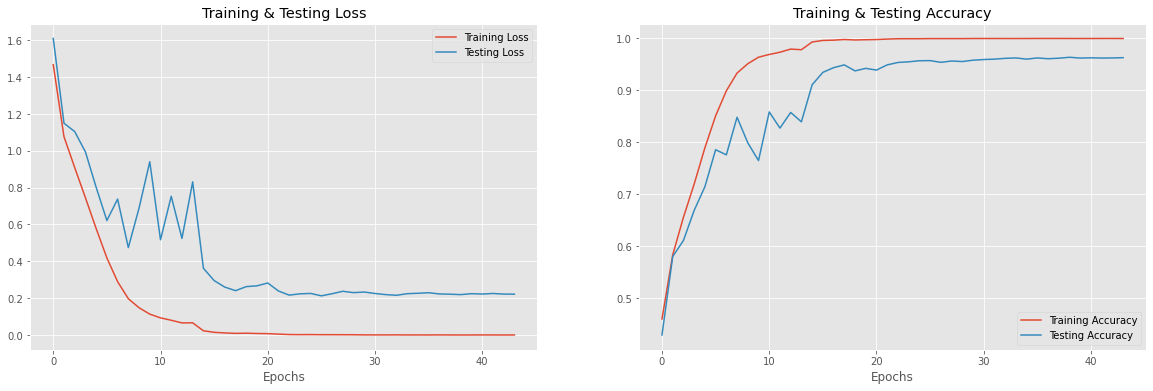

In [46]:
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
test_acc = history.history['val_acc']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(train_loss, label = 'Training Loss')
ax[0].plot(test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(train_acc, label = 'Training Accuracy')
ax[1].plot(test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [301]:
train_model = keras.models.load_model('speech_model.h5', custom_objects={'f1_m' : f1_m})

In [302]:
y_pred = train_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 2, 3, ..., 5, 6, 4], dtype=int64)

In [303]:
y_check = np.argmax(y_test, axis=1)
y_check

array([1, 2, 3, ..., 5, 6, 4], dtype=int64)

In [304]:
cm = confusion_matrix(y_true=y_check, y_pred=y_pred)

In [305]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1481    0   10    7   19   10    4    0]
 [   0  150    1    0    0    3    2    1]
 [  14    0 1491   14    9    7   14    0]
 [  10    0   18 1479   15    7   18    5]
 [  17    0   11   20 1441   13    7    7]
 [   5    2   13    3    6 1349   22    0]
 [   2    8   16    9    9   26 1448    2]
 [   1    0    0    3    2    1    0  498]]


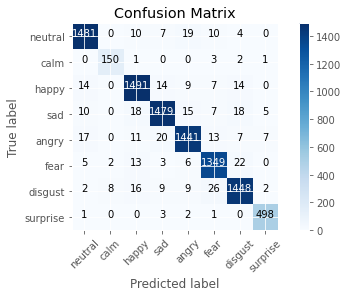

In [306]:
cm_plot_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [307]:
print(classification_report(y_check, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1531
           1       0.94      0.96      0.95       157
           2       0.96      0.96      0.96      1549
           3       0.96      0.95      0.96      1552
           4       0.96      0.95      0.96      1516
           5       0.95      0.96      0.96      1400
           6       0.96      0.95      0.95      1520
           7       0.97      0.99      0.98       505

    accuracy                           0.96      9730
   macro avg       0.96      0.96      0.96      9730
weighted avg       0.96      0.96      0.96      9730

